**Introduction**

---
Stocks
> A stock, or equity, is a financial instrument symbolizing ownership in a corporation. Referred to as "shares," it grants proportional rights to a fraction of assets and profits. Traded on stock exchanges, stocks form the core of investors' portfolios, subject to government regulations safeguarding against fraud.

Stock Market
> The stock market facilitates the interaction and transactions between buyers and sellers of securities. It functions as a platform for price discovery of corporate shares, serving as an economic barometer. Participants benefit from fair pricing, liquidity, and transparency through open market competition.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Quandl**

Quandl, a data platform, offers a diverse range of financial and economic datasets. In Python, the 'import quandl' statement is employed to integrate the Quandl library, enabling programmatic access to its datasets. This library facilitates the retrieval and manipulation of financial data, making it a valuable resource for analysts and developers. Particularly relevant for stock market prediction in Python, Quandl provides historical stock prices and financial metrics. Utilizing this data, practitioners can develop predictive models, employing machine learning techniques to forecast stock trends, aiding in investment decision-making.

In [3]:
!pip install quandl
import quandl

Get the data from quandl.
We are using the Tataglobal Stock for this Model.

In [4]:
!pip install quandl

In [5]:
import quandl

In [6]:
data = pd.read_csv('/content/drive/MyDrive/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


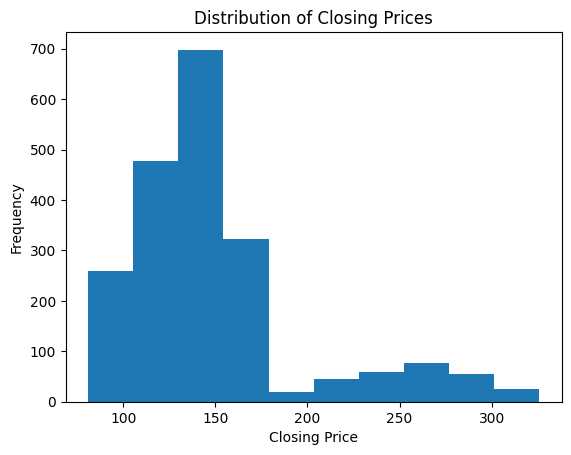

In [7]:
# @title Distribution of Closing Prices

import matplotlib.pyplot as plt
plt.hist(data['Close'])
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Closing Prices')

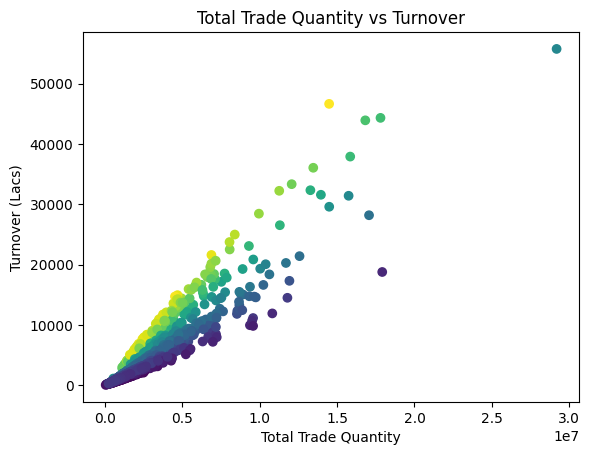

In [8]:
# @title Total Trade Quantity vs Turnover

import matplotlib.pyplot as plt
plt.scatter(data['Total Trade Quantity'], data['Turnover (Lacs)'], c=data['Close'], cmap='viridis')
plt.xlabel('Total Trade Quantity')
plt.ylabel('Turnover (Lacs)')
_ = plt.title('Total Trade Quantity vs Turnover')

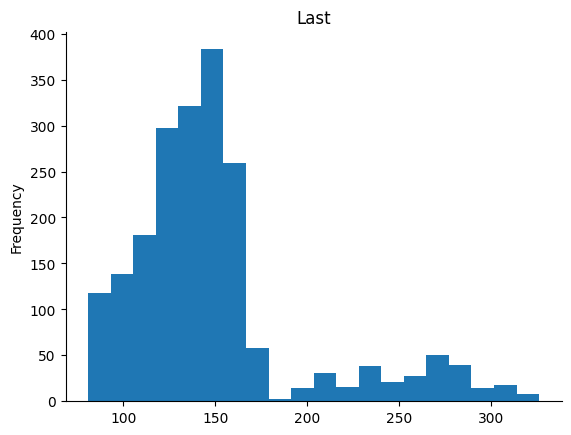

In [9]:
# @title Last

from matplotlib import pyplot as plt
data['Last'].plot(kind='hist', bins=20, title='Last')
plt.gca().spines[['top', 'right',]].set_visible(False)

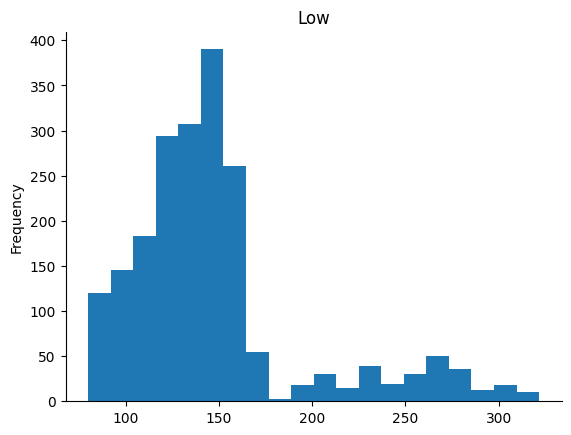

In [10]:
# @title Low

from matplotlib import pyplot as plt
data['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

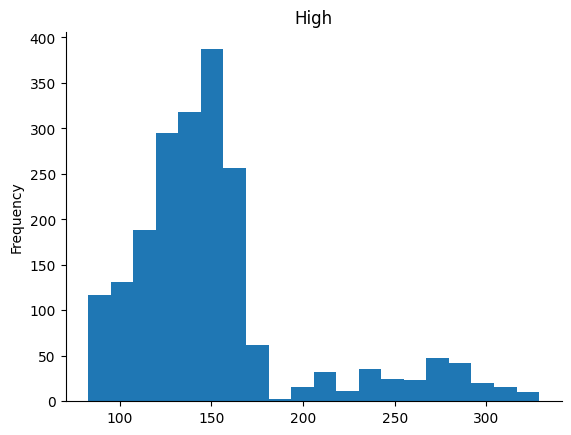

In [11]:
# @title High

from matplotlib import pyplot as plt
data['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

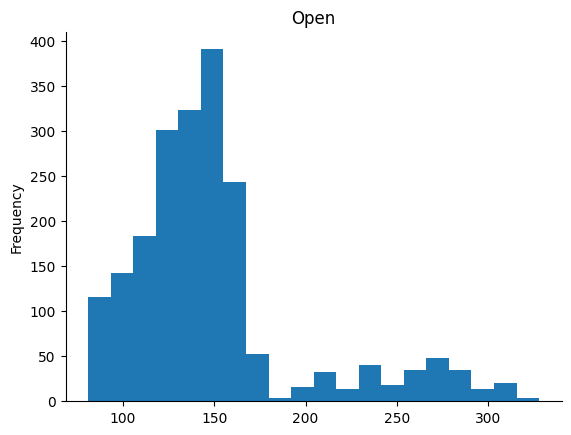

In [12]:
# @title Open

from matplotlib import pyplot as plt
data['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

The output represents historical stock market data for Tata Global Beverages (now known as Tata Consumer Products Limited) on the National Stock Exchange (NSE) for specific dates. Here's an explanation of the columns in the output:

1. **Date:** The date of the trading day.

2. **Open:** The opening price of the stock on that particular trading day.

3. **High:** The highest price the stock reached during the trading day.

4. **Low:** The lowest price the stock reached during the trading day.

5. **Last:** The last traded price of the stock on that day.

6. **Close:** The closing price of the stock on that day.

7. **Total Trade Quantity:** The total number of shares traded on that day.

8. **Turnover (Lacs):** The total turnover (value of all trades) in lakhs (a unit in the Indian numbering system equivalent to 100,000).

For example, on July 21, 2010:
- The stock opened at 122.1, reached a high of 123.0, and a low of 121.05.
- The last traded price was 121.1, and the closing price was 121.55.
- A total of 658,666 shares were traded, with a turnover of 803.56 lakhs.

This data provides insights into the stock's price movements, trading volume, and overall market activity on each specified date. Analysts and investors use such historical data to analyze trends, make predictions, and inform investment decisions.

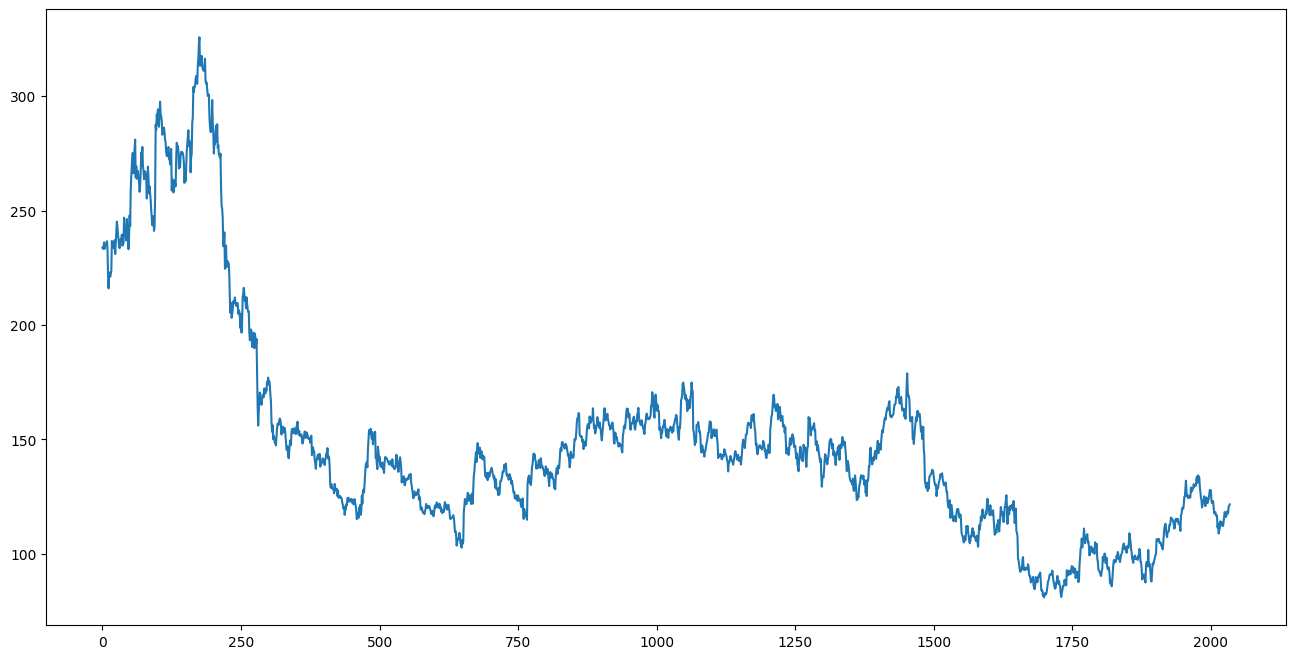

In [13]:
plt.figure(figsize = (16,8))
plt.plot(data['Close'], label = 'Closing Price')

**Classification**



---

Whether to Buy or Sell a stock.

We represent **Buy** with **(+1)** and **Sell** with **(-1)**

In [14]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()


The aforementioned code enhances a stock market dataset by introducing two key metrics: 'Open - Close,' depicting the daily opening-to-closing price difference, and 'High - Low,' capturing daily volatility. To uphold data quality, the code efficiently removes any rows containing missing values. This preprocessing is fundamental for precise analysis and modeling, particularly in the domain of stock market data, offering insights into intraday price movements and overall market volatility.



In [15]:
x = data[['Open - Close','High - Low']]
x.head(10)

,Open - Close,High - Low
0,0.30,5.75
1,1.30,5.70
2,5.75,7.50
3,-2.80,4.75
4,0.25,8.45
5,0.40,9.05
6,1.05,3.75
7,2.85,5.75
8,-3.45,7.75
9,-10.50,13.40


The above given results are of the features which determine the volatility of the stock. This enables us to decide whether to buy or sell a stock.

For Target Variable **y** for the Classification Task, we are storing +1 for Buy and -1 for Sell.

In [16]:
y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

The code `y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)` creates a binary variable 'y' in NumPy. It assigns a value of 1 if the next day's closing price is higher than the current day's closing price, and -1 otherwise. This is used in financial analysis for predicting whether a stock will increase or decrease in value the next day based on historical closing prices.

In [17]:
y

array([-1,  1,  1, ...,  1,  1, -1])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

**Implementation of KNN Classifier**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [20]:
#using GridSearchCV to find the best parameter
pms = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model =  GridSearchCV(knn, pms, cv=5)

In [21]:
#fit the model
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [22]:
#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print("Train Data Accuracy: %.2f" %accuracy_train)
print("Test Data Accuracy: %.2f" %accuracy_test)

Train Data Accuracy: 0.88
Test Data Accuracy: 0.86


In [23]:
predictions_classification =  model.predict(x_test)
predictions_classification

array([-1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
        1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1

In [24]:
actual_predictive_data = pd.DataFrame({'Actual Class' : y_test , 'Predicted Class' : predictions_classification})
actual_predictive_data.head(10)

,Actual Class,Predicted Class
0,-1,-1
1,1,1
2,1,-1
3,-1,-1
4,1,-1
5,-1,-1
6,1,1
7,-1,-1
8,1,1
9,-1,-1


In [25]:
y = data['Close']
y

,Close
0,233.75
1,233.25
2,234.25
3,236.10
4,233.30
...,...
2030,118.65
2031,117.60
2032,120.65
2033,120.90


**Regression By KNN**

Implementation of KNN Regressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [27]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25, random_state=42)

# Using GridSearchCV to find the best parameter
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn_reg = KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# Reshape y_train_reg and y_test_reg to be 1D arrays
y_train_reg = y_train_reg.values.ravel()
y_test_reg = y_test_reg.values.ravel()
y_train_reg = y_train_reg.reshape(-1, 1)
print(x_train_reg.shape, y_train_reg.shape)

# Fit the model
model_reg.fit(x_train_reg, y_train_reg)

# Access the best parameter
best_n_neighbors = model_reg.best_params_['n_neighbors']

# Continue with your predictions or evaluation
predictions_reg = model_reg.predict(x_test_reg)

(1526, 2) (1526, 1)


In [28]:
print(predictions_reg)

[[119.58928571]
 [186.35357143]
 [118.73214286]
 [126.72857143]
 [111.24642857]
 [136.02857143]
 [131.08928571]
 [202.97142857]
 [132.70714286]
 [237.27142857]
 [164.01428571]
 [138.49642857]
 [125.62142857]
 [166.31071429]
 [108.23214286]
 [196.66785714]
 [135.51785714]
 [134.39285714]
 [129.30357143]
 [204.225     ]
 [137.09285714]
 [155.75714286]
 [133.40714286]
 [132.11071429]
 [159.44642857]
 [208.71785714]
 [115.70357143]
 [116.46428571]
 [133.20714286]
 [120.99642857]
 [170.26785714]
 [148.56785714]
 [125.225     ]
 [137.04285714]
 [133.63928571]
 [134.93214286]
 [162.66785714]
 [128.42142857]
 [120.97142857]
 [132.00714286]
 [193.93571429]
 [195.56428571]
 [191.71071429]
 [136.76785714]
 [142.33571429]
 [236.425     ]
 [136.34642857]
 [181.21428571]
 [178.23928571]
 [158.14642857]
 [186.02857143]
 [144.93214286]
 [181.09285714]
 [134.37857143]
 [147.21785714]
 [212.93928571]
 [141.86071429]
 [192.75      ]
 [132.78214286]
 [168.675     ]
 [157.24285714]
 [167.04285714]
 [200.59

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, predictions_reg)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 43.205386877672886


In [30]:
valid = pd.DataFrame({'Actual Close': y_test_reg.ravel(), 'Predicted Close Value': predictions_reg.ravel()})
valid.head()


,Actual Close,Predicted Close Value
0,118.35,119.589286
1,286.20,186.353571
2,147.00,118.732143
3,131.80,126.728571
4,131.00,111.246429
